In [9]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

In [10]:
# Cargamos MNIST con Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
# Preprocesamiento
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
print(y_train.shape)
print(y_train[0])
print("len(y_train):",len(y_train))
y_train_matrix = np.zeros((len(y_train),10))
print("y_train_matrix.size:", y_train_matrix.size)
print("len(y_train_matrix):", len(y_train_matrix))
print("y_train_matrix.shape:", y_train_matrix.shape)
for i in range(len(y_train_matrix)):
    y_train_matrix[i][y_train[i]] = 1

y_train_matrix[:5]

(60000,)
5
len(y_train): 60000
y_train_matrix.size: 600000
len(y_train_matrix): 60000
y_train_matrix.shape: (60000, 10)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [4]:
# Vemos los tipos de datos que quedaron para
print(f"x_train dataType: {x_train.dtype}")
print(f"x_test dataType: {x_test.dtype}")

x_train dataType: float64
x_test dataType: float64


In [5]:
%whos

Variable          Type       Data/Info
--------------------------------------
ImageGrid         type       <class 'mpl_toolkits.axes<...>id1.axes_grid.ImageGrid'>
mixed_precision   module     <module 'keras.api.mixed_<...>d_precision/__init__.py'>
plt               module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
tf                module     <module 'tensorflow' from<...>/tensorflow/__init__.py'>
x_test            ndarray    10000x28x28: 7840000 elems, type `float64`, 62720000 bytes (59.814453125 Mb)
x_train           ndarray    60000x28x28: 47040000 elems, type `float64`, 376320000 bytes (358.88671875 Mb)
y_test            ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train           ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


In [6]:
# Ahora mostramos algunos elementos
im_list = []
n_samples_to_show = 16
c = 0
for i in range(n_samples_to_show):
    im_list.append(x_train[i])

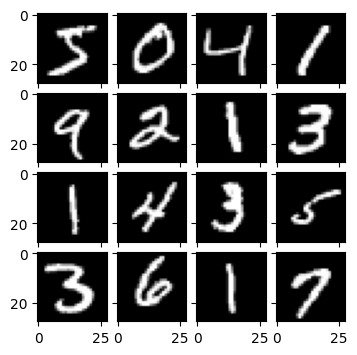

In [7]:
# Visualización
fig = plt.figure(figsize=(4.,4.))
grid = ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.1)

# Mostrar la grilla de imágenes
for ax, im in zip(grid, im_list):
    ax.imshow(im, 'gray')

plt.show()

In [8]:
# Dejamos los datos de training en flatten
x_train = x_train.reshape(-1, 784)

In [9]:
# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(64, activation="sigmoid"),
    tf.keras.layers.Dense(784, activation="sigmoid")
])

2024-11-06 22:59:30.494431: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
# Compilamos el modelo
optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam())
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size", 
                                                    name="mean_squared_error",
                                                    dtype=None))

In [11]:
# Entrenamos el modelo
model.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0712
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0240
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0192
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0166
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0150
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0128
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0100
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0081
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0069


In [27]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

###################################################################################################################
# El modelo original, donde debemos acertar el dígito
###################################################################################################################


# Dejamos los datos de training en flatten
x_train = x_train.reshape(-1, 784)


# Construcción del modelo
model_digit = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(64, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

# Compilamos el modelo
optimizer = mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam())
model_digit.compile(optimizer=optimizer,
                    loss=tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size", 
                                                          name="mean_squared_error",
                                                          dtype=None))

# Entrenamos el modelo
model_digit.fit(x_train, y_train_matrix, epochs=10)


Epoch 1/10


2025-06-05 15:13:09.135339: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0087
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0074
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0066
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0055
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0051
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0046


In [30]:
# Vemos cómo se comporta la red con los elementos del conjunto de prueba

# Dejamos los datos de training en flatten
x_test = x_test.reshape(-1, 784)
y_test_matrix = np.zeros((len(y_test),10))
for i in range(len(y_test_matrix)):
    y_test_matrix[i][y_test[i]] = 1

# Resultados de la evaluación
result_digit = model_digit.evaluate(x_test, y_test_matrix)

print(f"Loss: {result_digit}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0067
Loss: 0.005833957809954882


[613, 726, 6526, 5150, 8066, 6732, 8757, 4103, 4694, 8041, 5130, 4013, 2224, 6241, 7608, 2541]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


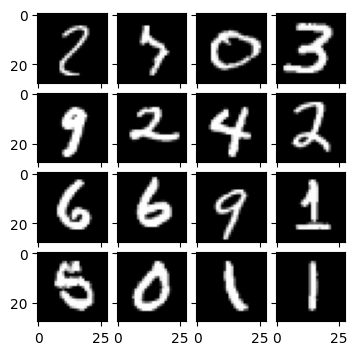

In [57]:
# Ahora queremos ver 16 ejemplos al azar desde el conjunto de prueba
# Ahora mostramos algunos elementos
import random

im_list = []
n_samples_to_show = random.sample(range(10000),16)
print(n_samples_to_show)
c = 0
results_test_16 = []
for i in n_samples_to_show:
    x_reshaped = x_test[i].reshape(28,28)
    im_list.append(x_reshaped)
    results_test_16 = model_digit.predict(x_test[i].reshape(-1,784),verbose=False)
    print([round(element) for element in results_test_16[0]])
    # print(results_test_16[0])

# Visualización
fig = plt.figure(figsize=(4.,4.))
grid = ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.1)

# Mostrar la grilla de imágenes
for ax, im in zip(grid, im_list):
    ax.imshow(im, 'gray')

plt.show()


In [12]:
print(x_test.shape)

(10000, 28, 28)


In [13]:
random_digit_prediction = model.predict(x_test[7583].reshape(-1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


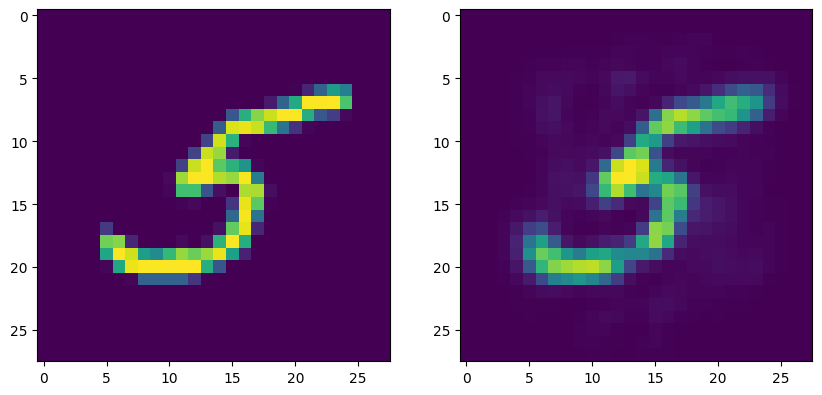

In [14]:
plt.figure(figsize=(10,5))

# imagen test
plt.subplot(1,2,1)
plt.imshow(x_test[7583])

# imagen predict
plt.subplot(1,2,2)
plt.imshow(random_digit_prediction.reshape(28,28))

plt.show()

In [15]:
weights = model.get_weights()

In [18]:
print(type(weights[0]))

<class 'numpy.ndarray'>


In [20]:
print(weights[0].shape)


(784, 64)


In [66]:
filtro01 = weights[0][:,20]

In [62]:
print(filtro01)

[ 1.72601044e-02  6.25833794e-02 -7.08842278e-03 -4.55953181e-03
 -6.46353811e-02  3.57420594e-02 -1.82198808e-02  7.65770599e-02
 -8.32199007e-02 -3.64948772e-02  2.37295106e-02 -6.40470088e-02
  4.20661308e-02  6.31631911e-02  4.23693731e-02 -4.76132007e-03
 -7.20490292e-02 -5.19667156e-02 -8.70162994e-03 -5.11989594e-02
 -1.50107592e-02 -7.68447667e-02 -2.77119912e-02 -1.43339485e-03
  3.66141647e-02  5.76721206e-02 -1.35921463e-02  6.71987012e-02
  7.75018260e-02  6.89564869e-02  6.97304085e-02  2.89570689e-02
 -6.04757480e-02 -2.91223824e-02  4.91223373e-02  5.83988689e-02
  3.81359607e-02  2.34416604e-01  2.18355015e-01  1.77306429e-01
  1.25177810e-02 -7.97297657e-02  1.44602895e-01  1.22498870e-01
 -4.74785119e-02  1.61267426e-02  5.47611304e-02 -3.67782032e-03
  1.06050774e-01  8.90064612e-02 -3.42919081e-02  4.46770061e-03
  5.02716750e-03  5.98844960e-02  4.69621047e-02 -6.28542900e-02
  7.90501907e-02  3.64180654e-02 -6.45822436e-02 -4.17532325e-02
  1.69576436e-01 -7.57746

In [49]:
print(type(filtro01))

<class 'numpy.ndarray'>


In [50]:
print(filtro01.shape)

(784,)


In [67]:
filtro01 = filtro01.reshape(28,28)

In [52]:
print(type(filtro01))

<class 'numpy.ndarray'>


In [53]:
print(filtro01.shape)

(28, 28)


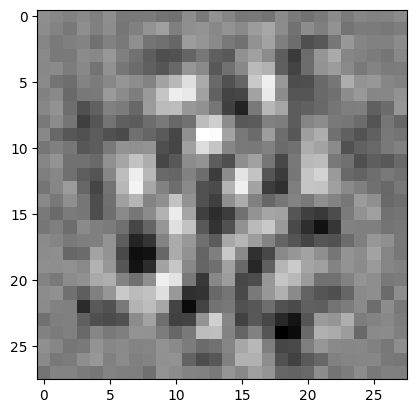

In [68]:
plt.imshow(filtro01, cmap='gray')

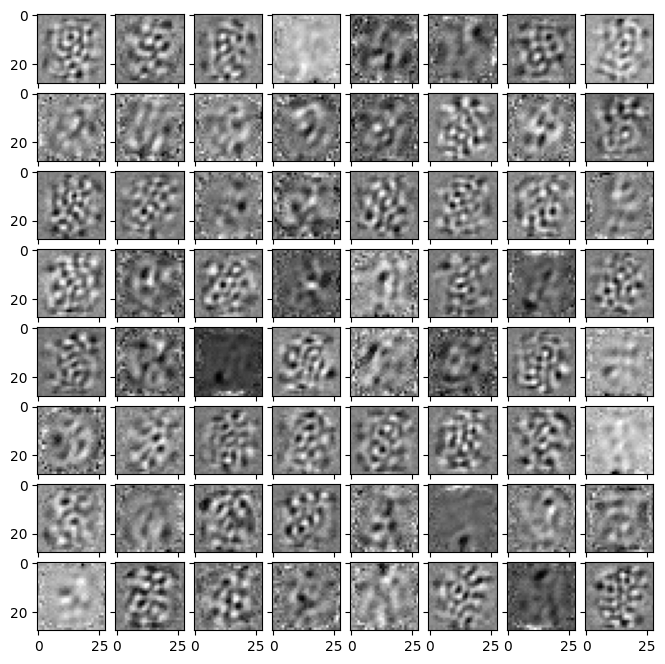

In [70]:
img_to_show_list = []
for i in range(64):
    img_filter = weights[0][:,i]
    img_filter = img_filter.reshape(28,28)
    img_to_show_list.append(img_filter)

fig = plt.figure(figsize=(8,8))

grid = ImageGrid(fig, 111,
                 nrows_ncols = (8,8),
                 axes_pad = 0.1)

for ax, filter_img in zip(grid, img_to_show_list):
    ax.imshow(filter_img,'gray')

plt.show()